<a href="https://colab.research.google.com/github/zheswien/Trainocate_AIML/blob/main/AIML_04_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2023-08-24 07:33:07--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2023-08-24 07:33:07 (2.78 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [116]:
import pandas as pd

df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [117]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [118]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [120]:
df.corr()

<ipython-input-120-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [121]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [122]:
corr_data = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY',
                'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']].corr()
corr_data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


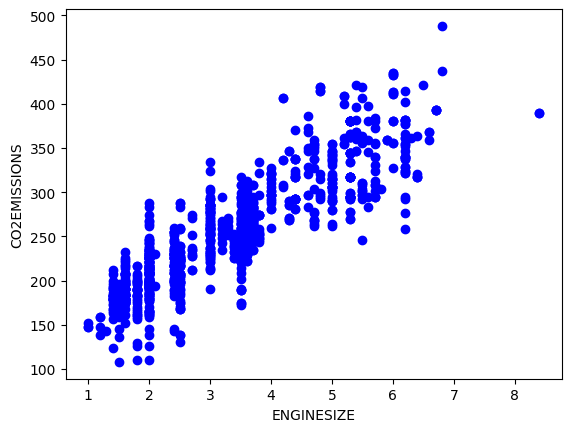

In [123]:
import matplotlib.pyplot as plt

plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, color='Blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

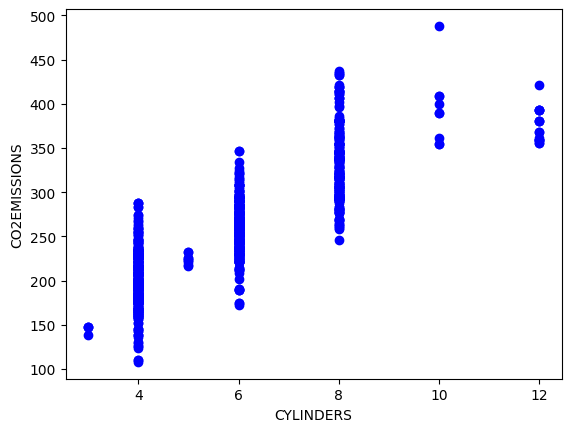

In [124]:
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS, color='Blue')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

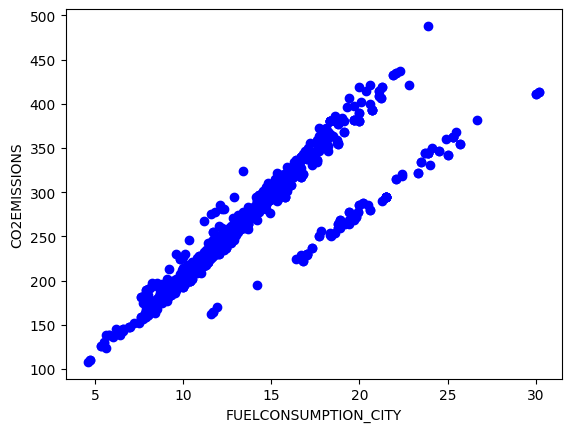

In [125]:
plt.scatter(df.FUELCONSUMPTION_CITY, df.CO2EMISSIONS, color='Blue')
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.show()

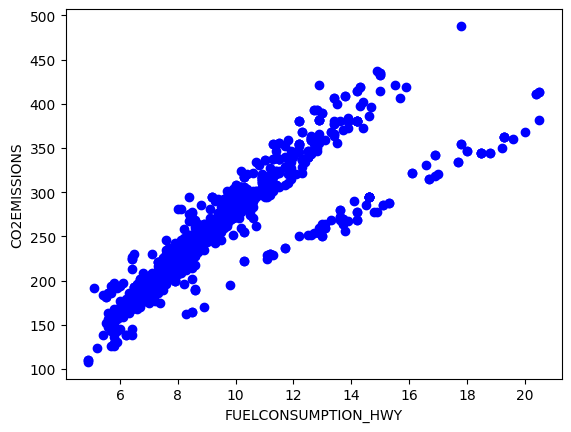

In [126]:
plt.scatter(df.FUELCONSUMPTION_HWY, df.CO2EMISSIONS, color='Blue')
plt.xlabel('FUELCONSUMPTION_HWY')
plt.ylabel('CO2EMISSIONS')
plt.show()

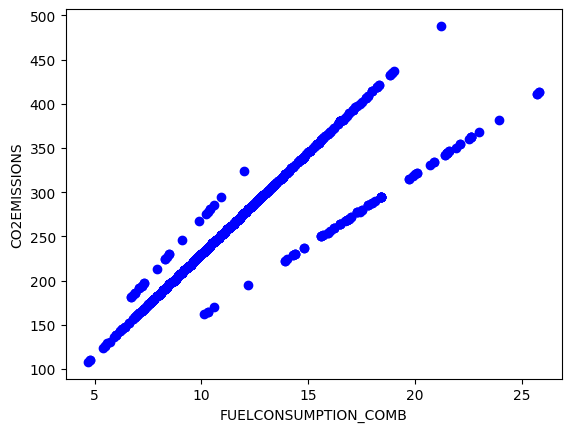

In [127]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS, color='Blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

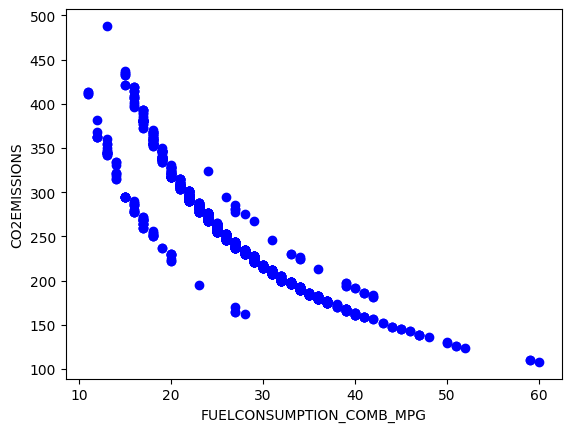

In [128]:
plt.scatter(df.FUELCONSUMPTION_COMB_MPG, df.CO2EMISSIONS, color='Blue')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2EMISSIONS')
plt.show()

1067


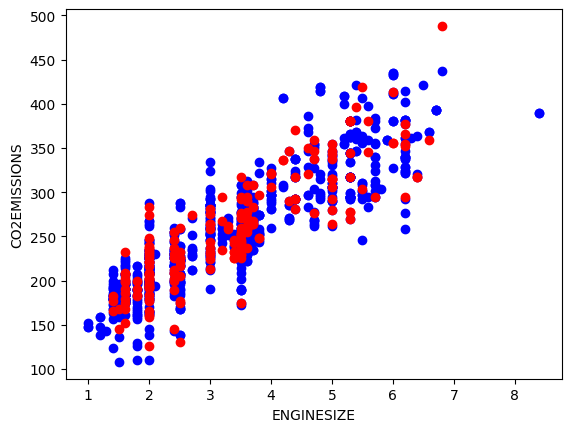

In [129]:
import numpy as np

print(len(df))
msk = np.random.rand(len(df)) < 0.8

train = df[msk] # 80%
test = df[~msk] # 20%

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='Blue')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='Red')

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [130]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

reg.fit(train_x, train_y)

print('theta zero is: ', reg.intercept_)
print('theta one is: ', reg.coef_)

theta zero is:  [125.68277486]
theta one is:  [[38.96944118]]


In [131]:
x = 2.4
y_hat = (reg.coef_ + x) + reg.intercept_
y_hat

array([[167.05221603]])

In [132]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = reg.predict(test_x)

from sklearn.metrics import r2_score
print(f"The value of R2 score is: {r2_score(test_y, test_y_)}")
print(f"The value of MSE score is: {np.mean(test_y_ - test_y)}")
print(f"The value of MAE score is: {np.mean(np.absolute(test_y_ - test_y))}")

The value of R2 score is: 0.7428593309325209
The value of MSE score is: -0.7455367907995981
The value of MAE score is: 24.31230001774405


In [133]:
reg1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

reg1.fit(train_x, train_y)

print('theta zero is: ', reg1.intercept_)
print('theta one is: ', reg1.coef_)

test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = reg1.predict(test_x)

from sklearn.metrics import r2_score
print(f"The value of R2 score is: {r2_score(test_y, test_y_)}")
print(f"The value of MSE score is: {np.mean(test_y_ - test_y)}")
print(f"The value of MAE score is: {np.mean(np.absolute(test_y_ - test_y))}")

theta zero is:  [82.08710625]
theta one is:  [[30.01497145]]
The value of R2 score is: 0.691390356745204
The value of MSE score is: -1.1102409654400518
The value of MAE score is: 26.46954788591933


In [134]:
# ** Self try, x sure correct or not

reg2 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

reg2.fit(train_x, train_y)

print('theta zero is: ', reg2.intercept_)
print('theta one is: ', reg2.coef_)

test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = reg2.predict(test_x)

from sklearn.metrics import r2_score
print(f"The value of R2 score is: {r2_score(test_y, test_y_)}")
print(f"The value of MSE score is: {np.mean(test_y_ - test_y)}")
print(f"The value of MAE score is: {np.mean(np.absolute(test_y_ - test_y))}")

theta zero is:  [247.9050468]
theta one is:  [[ 8.63062998  7.83654986 -4.73693947 -0.50754371  8.64803384 -3.72566146]]
The value of R2 score is: 0.8863806945202293
The value of MSE score is: -0.9712867767410281
The value of MAE score is: 14.040629365266444


## Polynomial Regression

In [146]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x) # transform to an array
train_x_poly

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

The equation and the sample example is displayed below.


It looks like feature sets for multiple linear regression analysis, right? Yes. It Does.
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x\_1$, $x\_1^2$ with $x\_2$, and so on. Then the 2nd degree equation would be turn into:

$$y = b + \theta\_1  x\_1 + \theta\_2 x\_2$$

Now, we can deal with it as a 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such problems.

so we can use LinearRegression() function to solve it:

In [147]:
clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

print ('theta zero is: ', clf.intercept_)
print ('theta one is: ', clf.coef_)

theta zero is:  [126.04997568]
theta one is:  [[ 0.         32.63783783  3.47429626 -0.42204328]]


Text(0, 0.5, 'Emission')

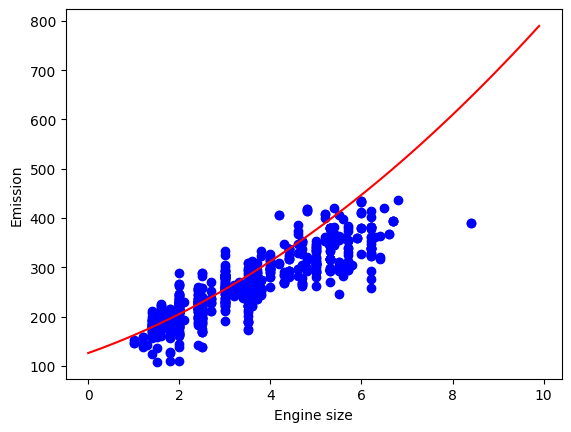

In [148]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [149]:
test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print ('The Value of R2_score is: ', r2_score(test_y, test_y_))


The Value of R2_score is:  -1.050294795951233


Coefficients:  [[ 0.00000000e+00  1.78826204e+02 -7.54324479e+01  1.91000596e+01
  -2.23589084e+00  9.55769582e-02]]
Intercept:  [27.7315645]


Text(0, 0.5, 'Emission')

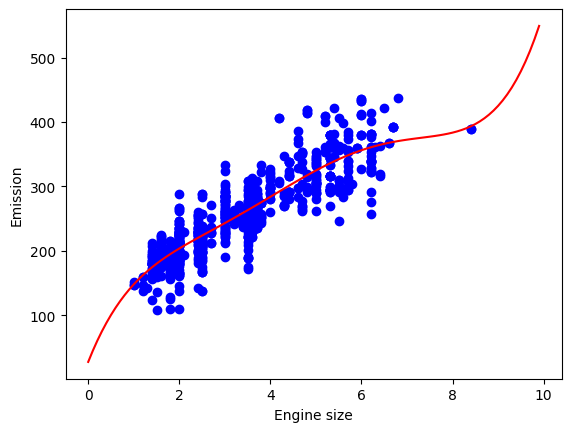

In [150]:
#Degree = 5


train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=5)
train_x_poly = poly.fit_transform(train_x)
train_x_poly


clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)


plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2) + clf.coef_[0][3]*np.power(XX, 3) + clf.coef_[0][4]*np.power(XX, 4) + clf.coef_[0][5]*np.power(XX, 5)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")